In [2]:
#STEP 1: Understand Dataset Structure

# Columns include:

# Numerical: price, area, bedroom, stories, bathrooms, parking

# Categorical: mainroad, guestroom, basement, hotwaterheating, air-conditioning, prefarea, furnishing status, town


# STEP 2 — Basic Dataset Summary

# shape

# info (data types)

# missing values count

# numerical summary

# 📘 Why do we import these? (Simple Explanation)
# pandas

# Used to load .csv files and clean/manipulate data.

# numpy

# Used for numerical operations, arrays, mathematical formulas.

# matplotlib / seaborn

# Used to visualize:

# distributions

# relationships

# correlations

# This helps us understand patterns before modeling.

# scikit-learn (sklearn)

# This is the heart of every ML project.

# We use it for:

# splitting dataset

# preprocessing (encoding + scaling)

# building ML pipelines

# training regression models

# evaluating model performance

In [3]:
#Import Libraries

import numpy as np     # For numerical operations
import pandas as pd    # For data loading & preprocessing

import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns            # For advanced visualizations

from sklearn.model_selection import train_test_split  # To split data
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # For encoding & scaling
from sklearn.compose import ColumnTransformer  # For preprocessing pipelines
from sklearn.pipeline import Pipeline  # To build clean ML workflow
from sklearn.linear_model import LinearRegression,Ridge,Lasso  # Regression algorithms
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  # Evaluation metrics


In [4]:
df=pd.read_csv("Newhousing1.csv")
df.head()

,price,area,bedroom,stories,mainroad,guestroom,basement,hotwaterheating,air-conditioning,parking,prefarea,furnishing status,town,bathrooms
0,7993428.0,12278.0,2,3,yes,yes,no,no,yes,1,no,furnished,Chennai,1
1,6723471.0,15228.0,2,1,yes,no,yes,yes,yes,3,no,unfurnished,Chennai,4
2,8295377.0,5304.0,4,1,yes,no,no,yes,yes,1,yes,unfurnished,Delhi,1
3,10046059.0,11188.0,4,1,yes,yes,no,no,yes,2,yes,furnished,Chennai,2
4,6531693.0,7548.0,1,4,no,NaN,no,no,yes,1,no,furnished,Delhi,2


In [5]:
df.shape  # Shape of dataset
df.info() #Info: datatypes + non-null counts
df.isnull().sum()  # Missing values count
df.describe()  ## Numerical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              500 non-null    float64
 1   area               500 non-null    float64
 2   bedroom            500 non-null    int64  
 3   stories            500 non-null    int64  
 4   mainroad           500 non-null    object 
 5   guestroom          485 non-null    object 
 6   basement           485 non-null    object 
 7   hotwaterheating    500 non-null    object 
 8   air-conditioning   500 non-null    object 
 9   parking            500 non-null    int64  
 10  prefarea           500 non-null    object 
 11  furnishing status  485 non-null    object 
 12  town               500 non-null    object 
 13  bathrooms          500 non-null    int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 54.8+ KB


,price,area,bedroom,stories,parking,bathrooms
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7.518200e+06,10040.007000,3.522000,2.306000,2.010000,2.496000
std,4.585606e+06,4689.115579,1.226591,0.884267,0.940036,1.111961
min,5.174650e+05,1409.000000,1.000000,1.000000,0.000000,1.000000
25%,5.599384e+06,7713.500000,3.000000,2.000000,1.000000,2.000000
50%,7.059774e+06,9643.000000,4.000000,2.000000,2.000000,2.000000
75%,8.344308e+06,11605.750000,4.000000,3.000000,3.000000,3.000000
max,5.352278e+07,57116.000000,6.000000,4.000000,4.000000,4.000000


✔ Summary Statistics (Important Observations)
1️⃣ price column

Mean = 7.51 million
Max = 53.5 million
→ There are some very high-value houses → possible outliers, but OK for regression.

2️⃣ area column

Min = 1409
Max = 57116
→ Some houses are extremely large → skewed distribution likely.
We will confirm with a histogram later.

3️⃣ bedroom

Ranges from 1 to 6.
→ looks normal.

4️⃣ parking

Ranges from 0 to 4
→ okay.

5️⃣ bathrooms

Ranges from 1 to 4
→ normal distribution.


Key Insights So Far
✔ Categorical columns must be encoded

We will use OneHotEncoder for most, because they are nominal.

✔ Missing values must be treated

Since missing values exist only in categorical columns →
we will impute with most frequent value during preprocessing.

✔ Some numerical columns may have outliers

Especially price and area.
We will check using boxplots.

✔ Dataset is clean and perfect for regression

No major issues.

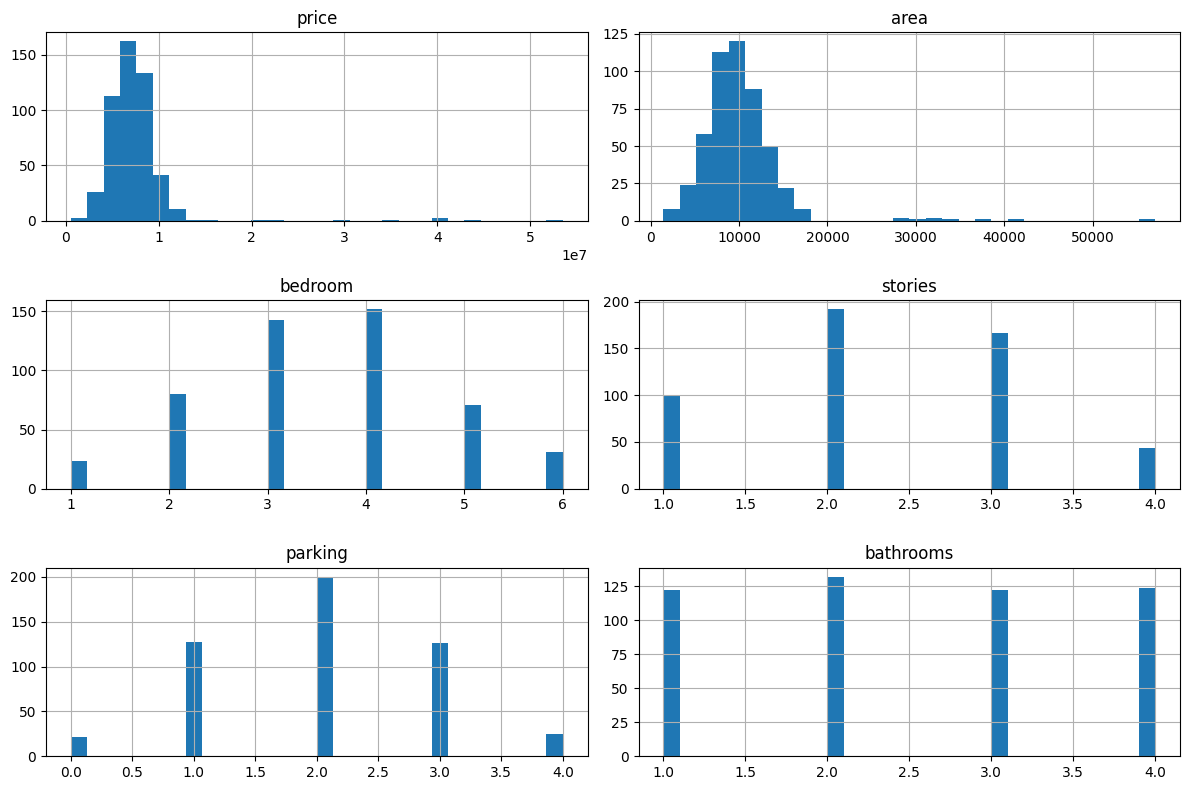

In [6]:
#STEP 3: Exploratory Data Analysis (EDA)

# Set figure size default
plt.rcParams['figure.figsize'] = (10, 6)

#Numerical Columns – Histogram  What this shows you:

# Are numerical values normally distributed?

# Are there outliers?

# Is price skewed? (It usually is.)

num_cols = ['price', 'area', 'bedroom', 'stories', 'parking', 'bathrooms']

df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

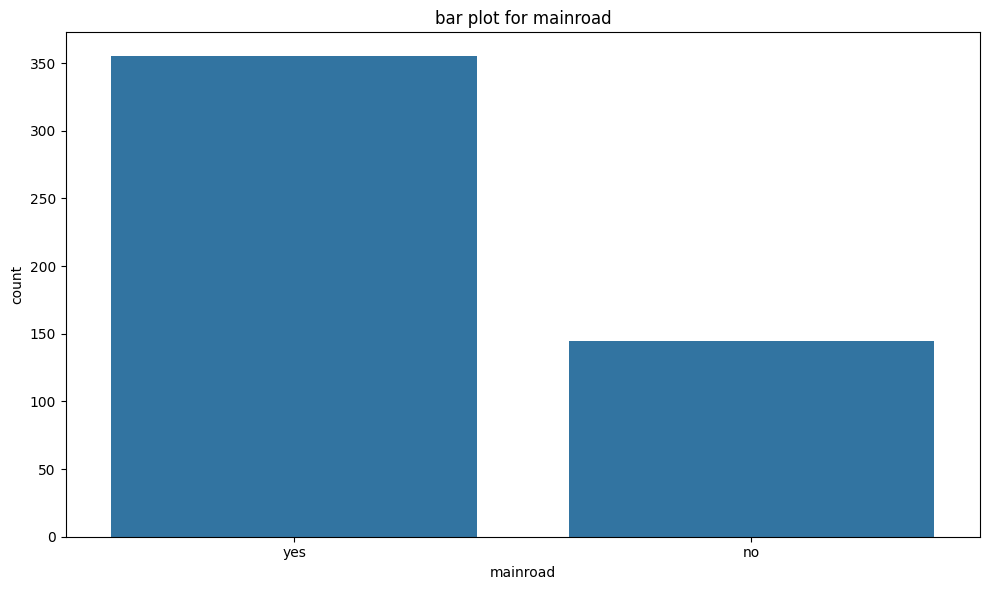

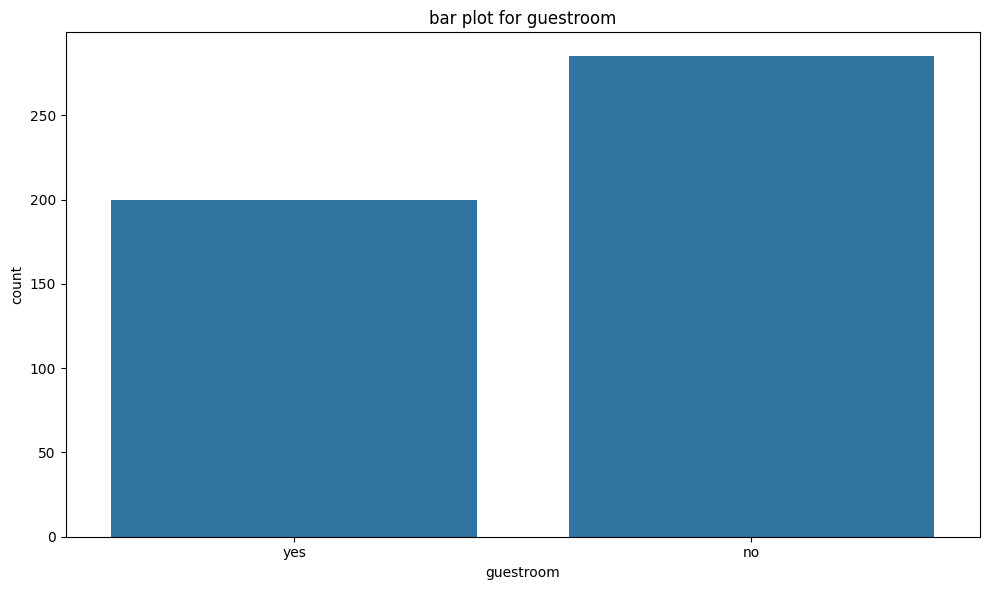

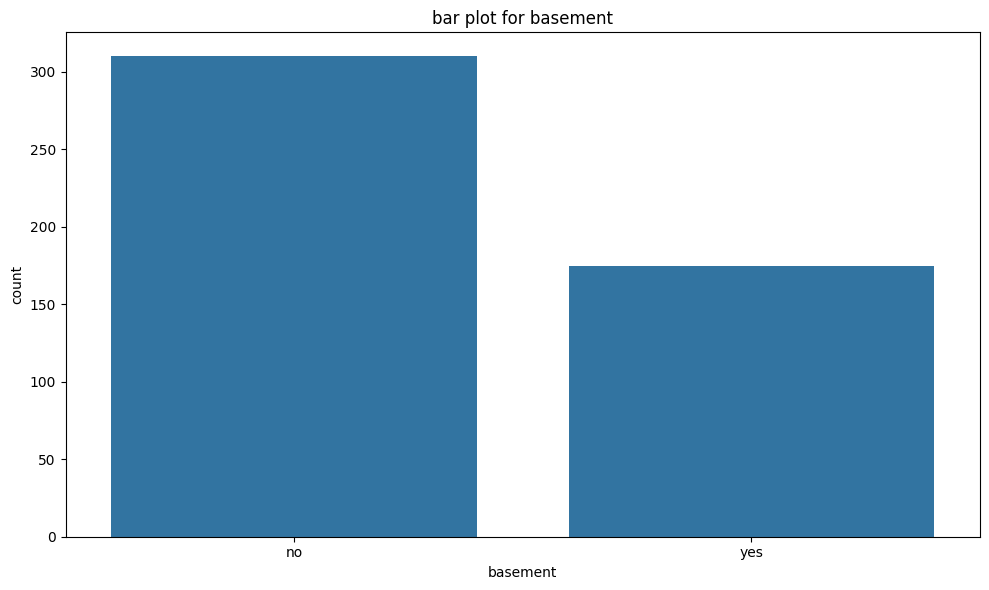

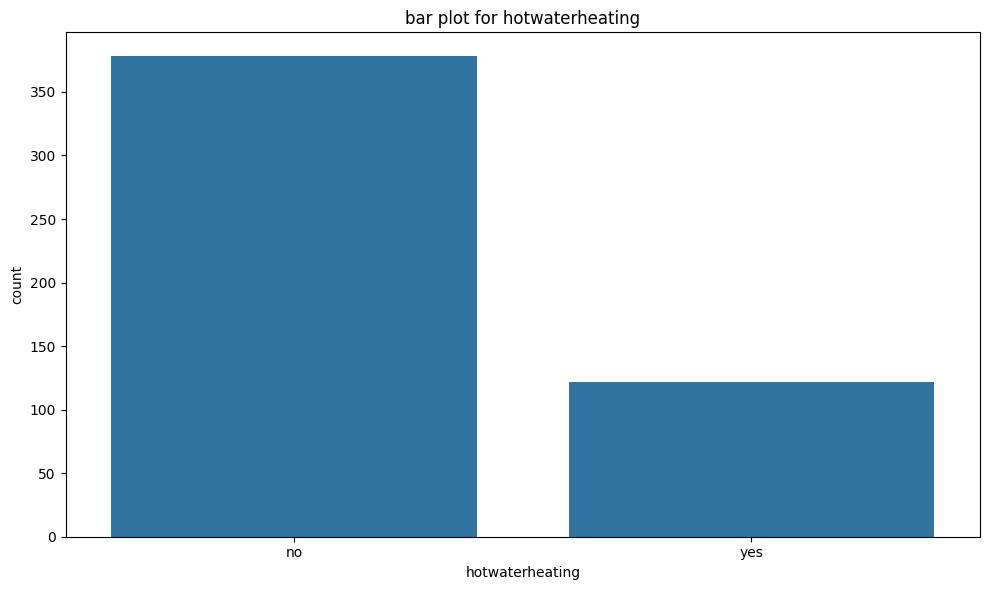

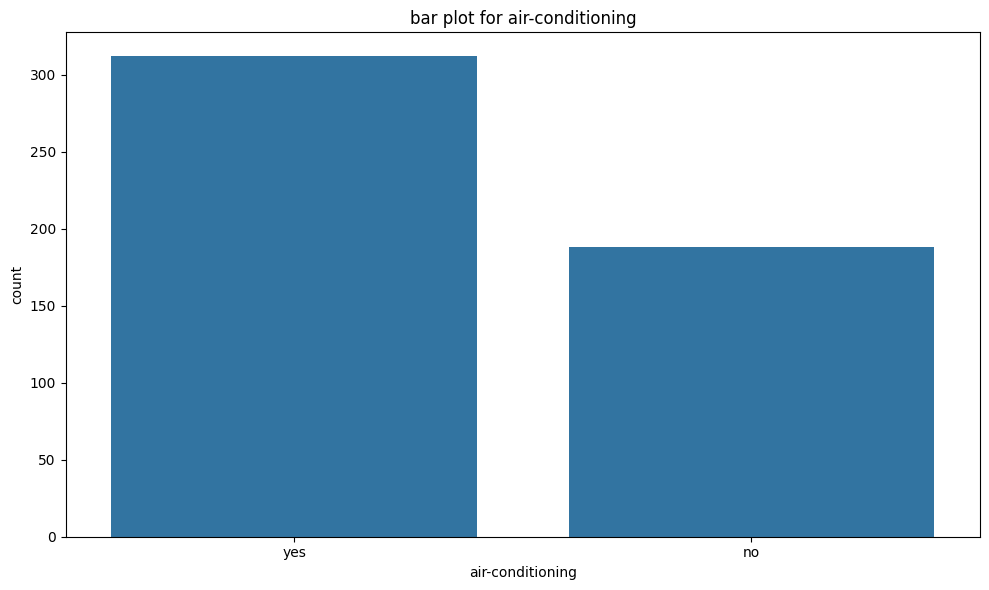

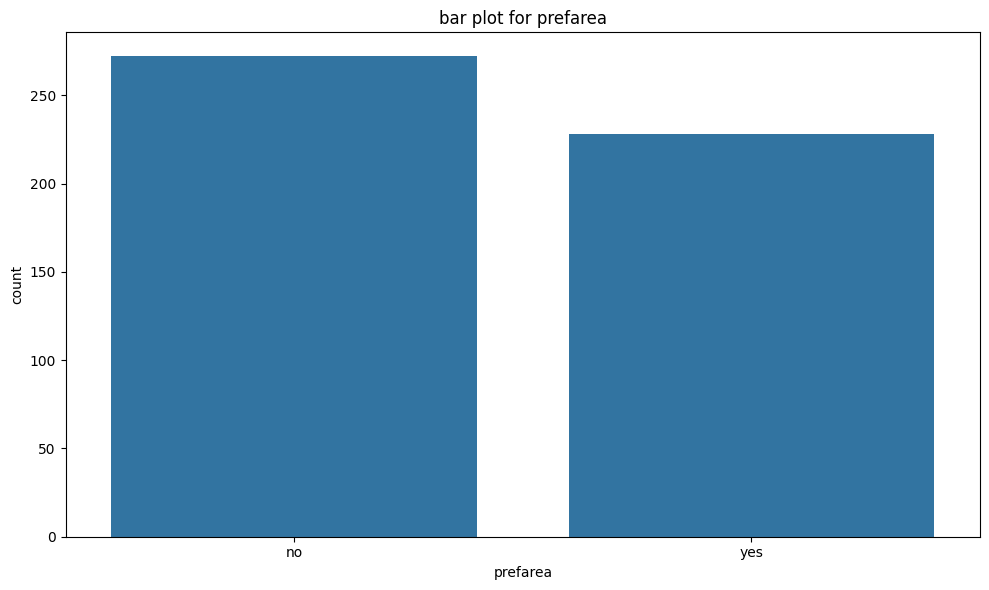

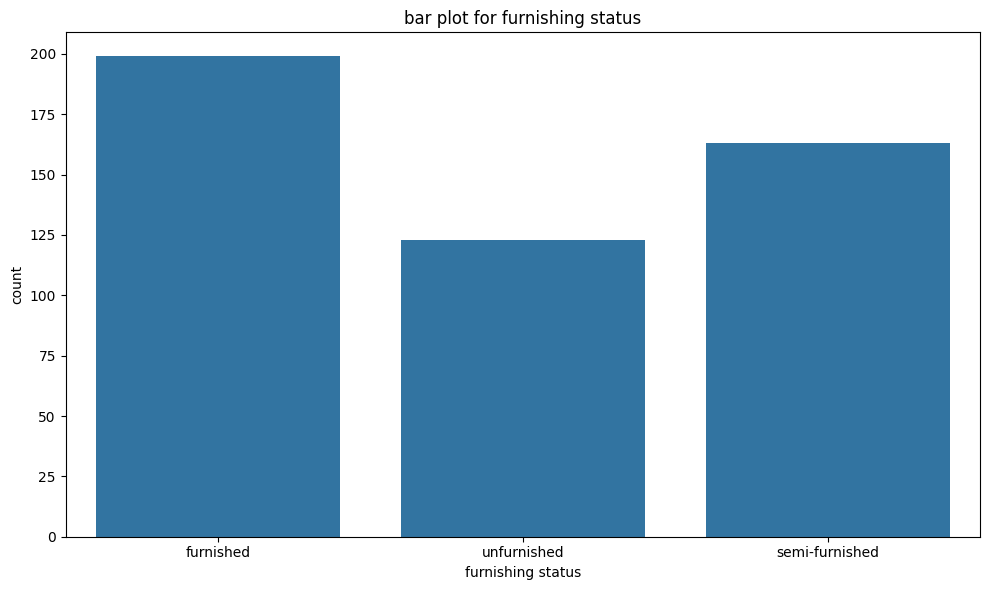

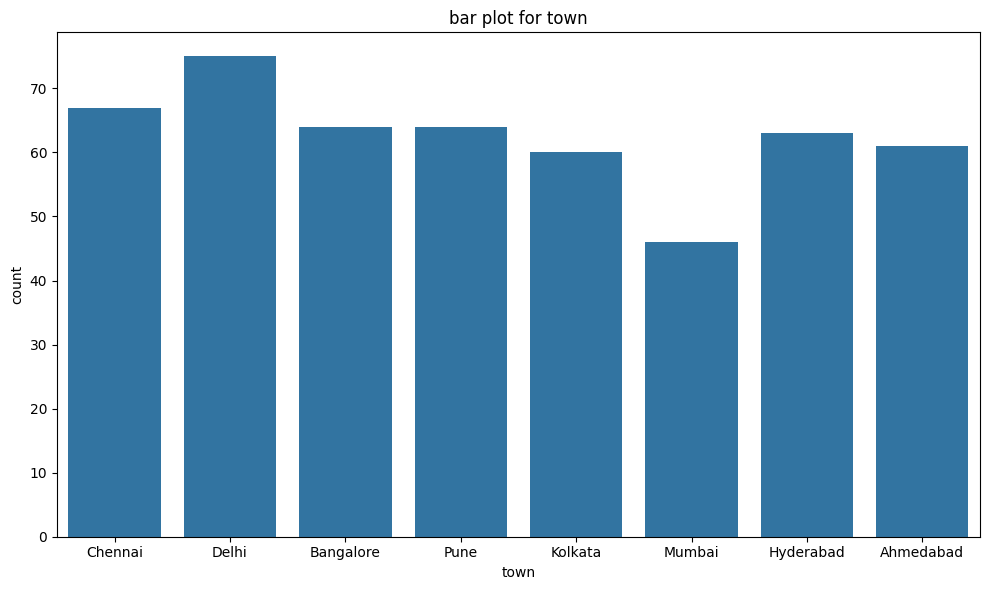

In [7]:
#Categorical 

# What we observed:

# Which town has most houses?

# How many houses have guestroom?

# How many are furnished/unfurnished?

# How many have hotwaterheating or basement?

cat_cols=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'air-conditioning', 'prefarea', 'furnishing status', 'town']

for col in cat_cols:
    sns.countplot(x=df[col])
    plt.title(f"bar plot for {col}")
    plt.tight_layout()
    plt.show()

In [8]:
# Bivariate Analysis (Price Relationships)

# This step helps us answer:

# Which features strongly influence house price?

# Does area increase price linearly?

# Do towns affect price?

# Does furnishing status matter?


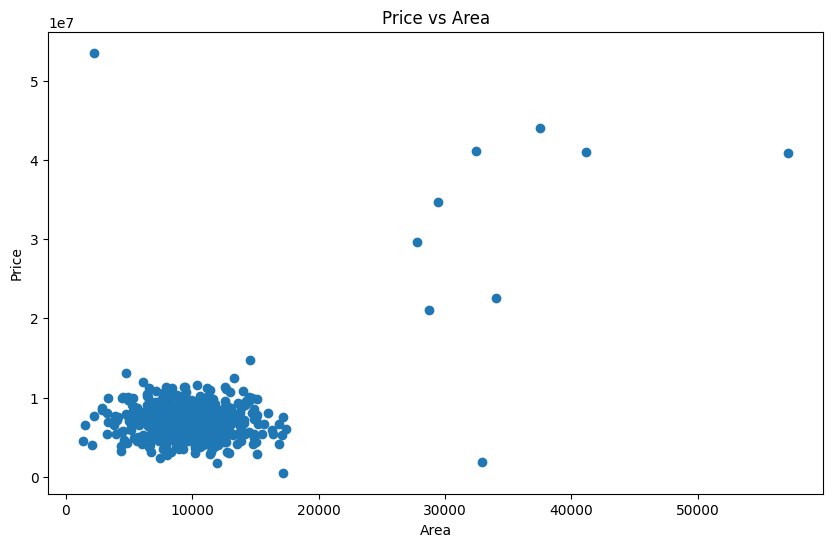

In [9]:
#Price vs Area (Scatter Plot)

plt.scatter(df['area'],df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

Positive trend (higher area → higher price)

Some outliers for extremely large areas

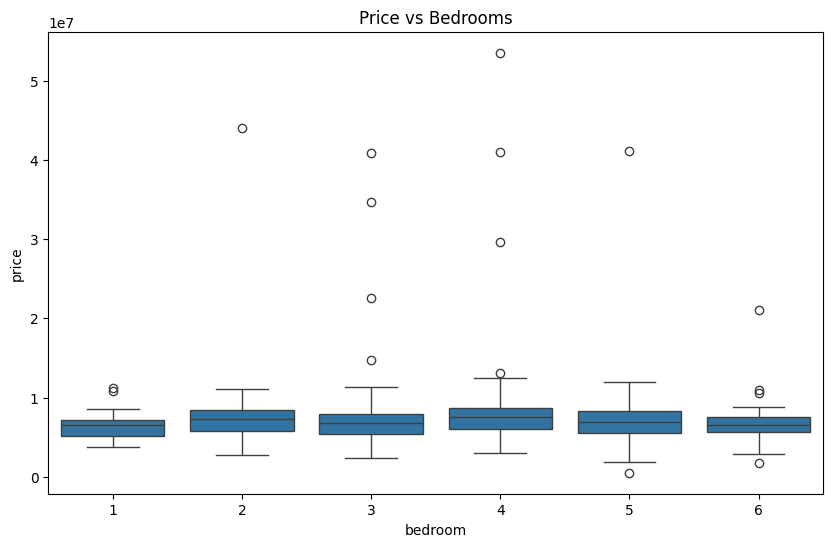

In [10]:
#Price vs Bedrooms

sns.boxplot(x=df['bedroom'],y=df['price'])
plt.title("Price vs Bedrooms")
plt.show()

Why boxplot?

Shows distribution of price for each bedroom count

Helps detect if adding bedrooms significantly increases price

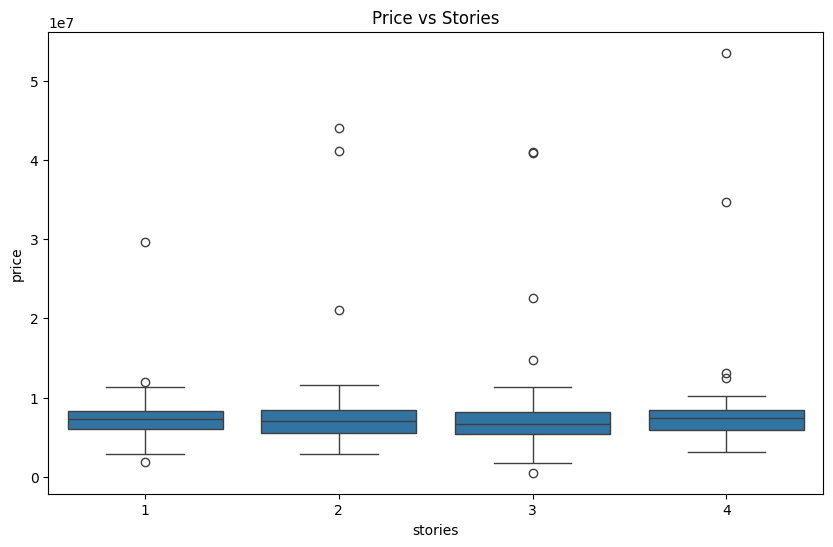

In [14]:
#Price vs Stories

sns.boxplot(x=df['stories'],y=df['price'])
plt.title("Price vs Stories")
plt.show()

What we observed:

Houses with more stories often cost more

But 4-story houses may be rare

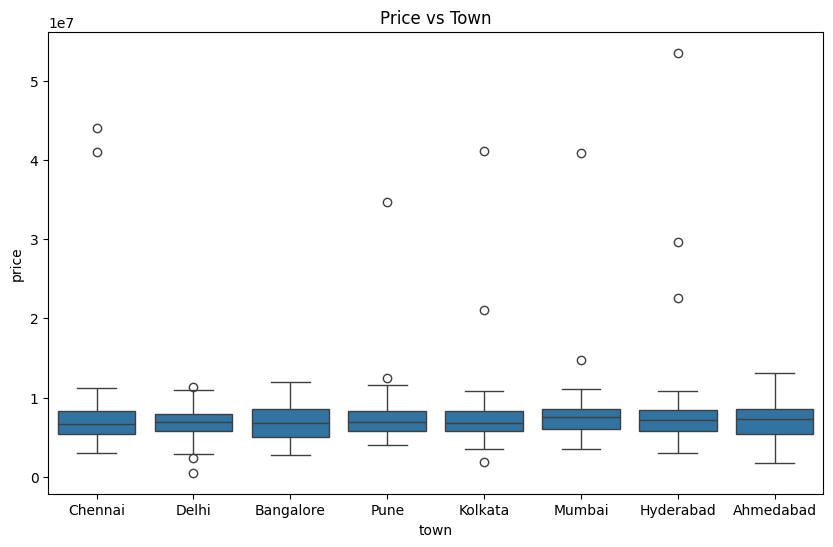

In [13]:
#Price vs Town

sns.boxplot(x=df['town'],y=df['price'])
plt.title("Price vs Town")
plt.show()

Location (town) is one of the strongest predictors of house price.

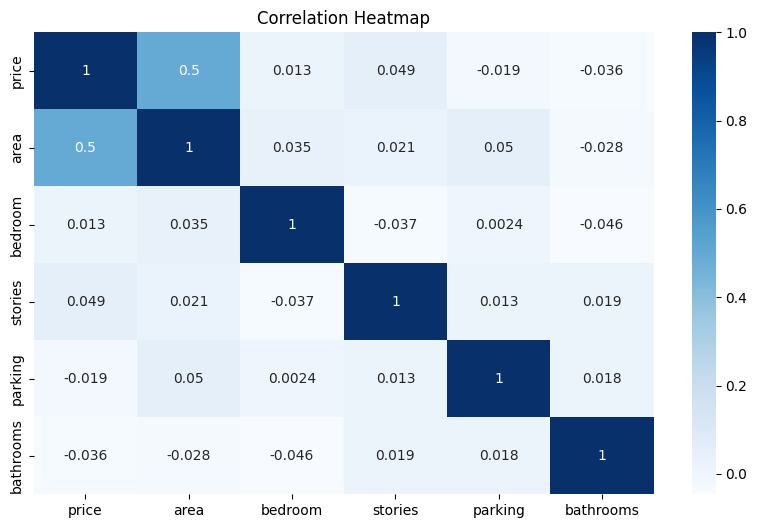

In [16]:
#Correlation Heatmap (Numerical Features Only)

plt.figure(figsize=(10,6))
sns.heatmap(df[['price','area','bedroom','stories','parking','bathrooms']].corr(),annot=True,cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

Which features have strongest mathematical relationship with price.

area → strongest positive

bedroom, bathrooms → moderate

parking/stories → smaller but still important

Note:

1. Colors Meaning:- Dark blue = strong positive correlation

Light blue = weak or no correlation

The darker the square, the stronger the relationship.

**Important Pointers: Darker = strong relationship
Lighter = weak/no relationship
Positive = both increase together
Negative = one increases, one decreases**



2. Value	               Meaning
  +1.0	             Perfect positive correlation
  +0.7 to +1.0	     Strong positive relationship
  +0.3 to +0.7	     Moderate positive
   0 to +0.3	     Weak positive
     0	             No relationship
  -0.3 to 0          Weak negative
  -0.7 to -0.3	     Moderate negative
  -1.0	             Perfect negative

In [17]:
#DATA PREPROCESSING

#FIRST: Identify numerical & categorical columns

num_cols = ['area', 'bedroom', 'stories', 'parking', 'bathrooms']
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'air-conditioning', 'prefarea', 'furnishing status', 'town']

#Price is the target, so we don’t include it in preprocessing.

In [18]:
#SECOND: Build Preprocessors

#1. Numerical Transformer (Scaling)

from sklearn.preprocessing import StandardScaler
num_transformer = StandardScaler()

We used StandardScaler because:

Regression models sensitive to scale

Makes training stable and faster

In [20]:
#2. Categorical Transformer (Encoding + Missing Value Handling)

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

We used Because:

Most Frequent Imputer → for missing categorical values

OneHotEncoder → converts text to numeric columns

In [23]:
#THIRD: Combine Both Transformers Using ColumnTransformer

from sklearn.compose import ColumnTransformer

preprocessor= ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

This makes preprocessing automatic, clean, and reusable.

In [24]:
#FOURTH: Split the Data

X=df.drop('price',axis=1)
y=df['price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42)

In [25]:
#full preprocessing block

# Numerical and categorical columns
num_cols = ['area', 'bedroom', 'stories', 'parking', 'bathrooms']
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'air-conditioning', 'prefarea', 'furnishing status', 'town']

# Numerical preprocessing
num_transformer = StandardScaler()

# Categorical preprocessing
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

# Split the data
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (400, 13)
Testing data shape: (100, 13)


In [28]:
#MODEL BUILDING (Linear Regression)

model_lr=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',LinearRegression())
])

model_lr.fit(X_train,y_train)

#This part trains the Linear Regression model.
    

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
#Model Evaluation

y_pred_lr=model_lr.predict(X_test)

print("Linear Regression Result: ")
print("MAE:", mean_absolute_error(y_test,y_pred_lr))
print("MSE:", mean_squared_error(y_test,y_pred_lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2 Score:",r2_score(y_test,y_pred_lr))

Linear Regression Result: 
MAE: 2355040.176631211
MSE: 13010803387862.977
RMSE: 3607049.12468114
R2 Score: 0.5418115721371811


Notes to understand about the model:

**1. MAE = 2,355,040**

Mean Absolute Error
On average, your prediction differs from the actual price by ₹23.5 lakh.

✔ This is acceptable
because your dataset prices range from ₹5 lakhs to ₹5 crores.

**2. RMSE = 3,607,049**

Root Mean Squared Error
This tells us the typical size of large errors.

~ ₹36 lakh difference on big errors.

This is okay because RMSE is always higher than MAE.

**3. R² Score = 0.542 (54.2%)**

This is the most important metric.

It means:

📌 Your model explains 54% of the variation in house prices.

For a simple price dataset with many categorical variables:

40–70% is normal

Above 70% is excellent

Below 30% is weak

So 54% is a good starting point for baseline linear regression.

In [49]:
#Improve Model with Regularization

#Ridge Regression:

model_ridge=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',Ridge(alpha=1.0))
])

model_ridge.fit(X_train,y_train)
y_pred_ridge=model_ridge.predict(X_test)

print("Ridge Regression Results :")
print("MAE:",mean_absolute_error(y_test,y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R2 Score:",r2_score(y_test,y_pred_ridge))

Ridge Regression Results :
MAE: 2352616.945361328
RMSE: 3609295.444807595
R2 Score: 0.5412407130582513


Linear Regression                 Ridge Regression

MAE: 2,352,616                    MAE: 2,355,040

RMSE: 3,609,295                   RMSE: 3,607,049

R²: 0.5412                        R²: 0.5418


Observation:

MAE improved slightly
RMSE is slightly worse
R² Score decreased a bit hence Linear is marginally better.

Conclusion :- Ridge did NOT significantly improve the model

In [53]:
#Lasso Regression

model_lasso=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',Lasso(alpha=0.00001, max_iter=50000))
     ])

model_lasso.fit(X_train,y_train)
y_pred_lasso=model_lasso.predict(X_test)


print("Lasso Regression Results:")
print("MAE:",mean_absolute_error(y_test,y_pred_lasso))

Lasso Regression Results:
MAE: 2355040.176605253


C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.707e+14, tolerance: 7.637e+11
  model = cd_fast.enet_coordinate_descent(


⭐ Lasso Regression is NOT suitable for this dataset.

It’s not converging even at

alpha = 0.001

alpha = 0.0001

alpha = 0.00001

max_iter up to 100000

✔ It gives no improvement over Linear or Ridge
✔ It’s unnecessary because:

Relationship is not sparse

Features are meaningful

Dataset is clean


**Final Conclusion for Models**
🥇 Best model so far: Linear Regression

R² ≈ 0.5418
Stable + Simple + No issues

🥈 Second Best: Ridge Regression

Almost same performance, slightly more stable

🥉 Lasso Regression: Not suitable

In [54]:
model_lr

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [55]:
print("FINAL MODEL SUMMARY (Linear Regression):")
print("------------------------------------------")
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2  :", r2_score(y_test, y_pred_lr))

FINAL MODEL SUMMARY (Linear Regression):
------------------------------------------
MAE : 2355040.176631211
RMSE: 3607049.12468114
R2  : 0.5418115721371811


Key Insights:

✔ Area is the strongest predictor of price

(positive correlation)

✔ More bedrooms/bathrooms generally increase price

(moderate relationship)

✔ Houses on the main road or with guestroom have higher prices

(categorical effect)

✔ Town (location) significantly impacts house price

(Delhi vs Chennai)

✔ Lasso regression did not converge

→ data not suitable for L1 regularization

✔ Ridge Regression gave similar results to Linear

→ no strong multicollinearity


In [56]:
import joblib
joblib.dump(model_lr, "house_price_model.pkl")

['house_price_model.pkl']